In [1]:
# prerequisites
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from utils import *
from models import MNIST_SITE

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [2]:
# path to the dataset
model_path = './models/MNIST'

#  path to the model weights
data_path = '../data'
batch_size = 20

val_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size, shuffle=False)

In [3]:
site = MNIST_SITE().to(device)
site.load_state_dict(torch.load(os.path.join(model_path, 'all_CNN')))
site.eval()
print(f'Models are properly loaded! There are totally {get_n_params(site)} parameters.')

Models are properly loaded! There are totally 1365472 parameters.


In [4]:
# initialize the iterator
it = iter(val_loader)

Original images:


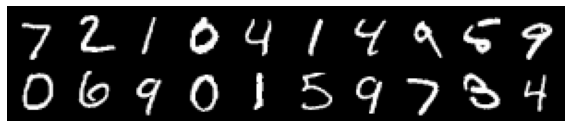

In [5]:
# get original images
image, label = it.next()
image, label = image.to(device), label.to(device)

print("Original images:")
imshow(image)

Transformed images:


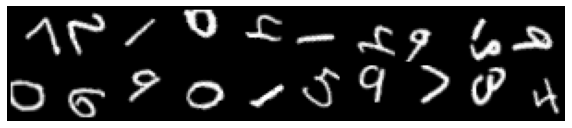

In [6]:
## transformed images
theta = get_theta(batch_size)
t_image = transform(image, theta, dataset = 'MNIST')

print("Transformed images:")
imshow(t_image)

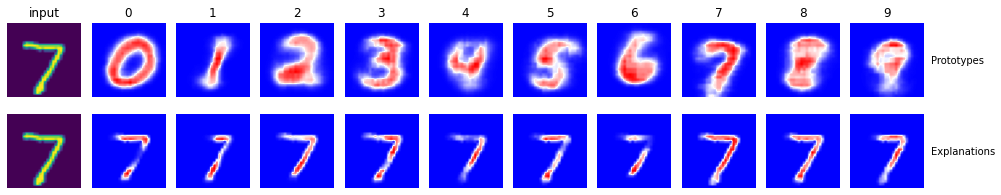

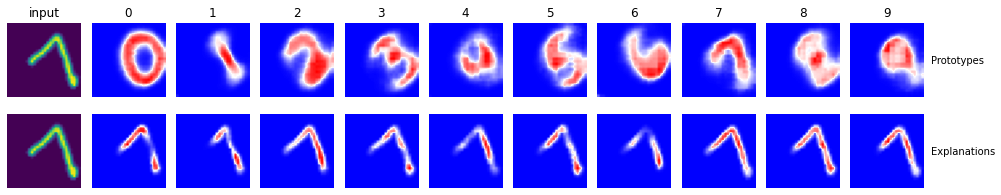

In [7]:
# image id in the batch
image_id = 0
img = image[image_id][None]
t_img = t_image[image_id][None]

prototypes, y = site.get_explanation(img)
t_prototypes, y = site.get_explanation(t_img)
plot_MNIST(img, prototypes)
plot_MNIST(t_img, t_prototypes)